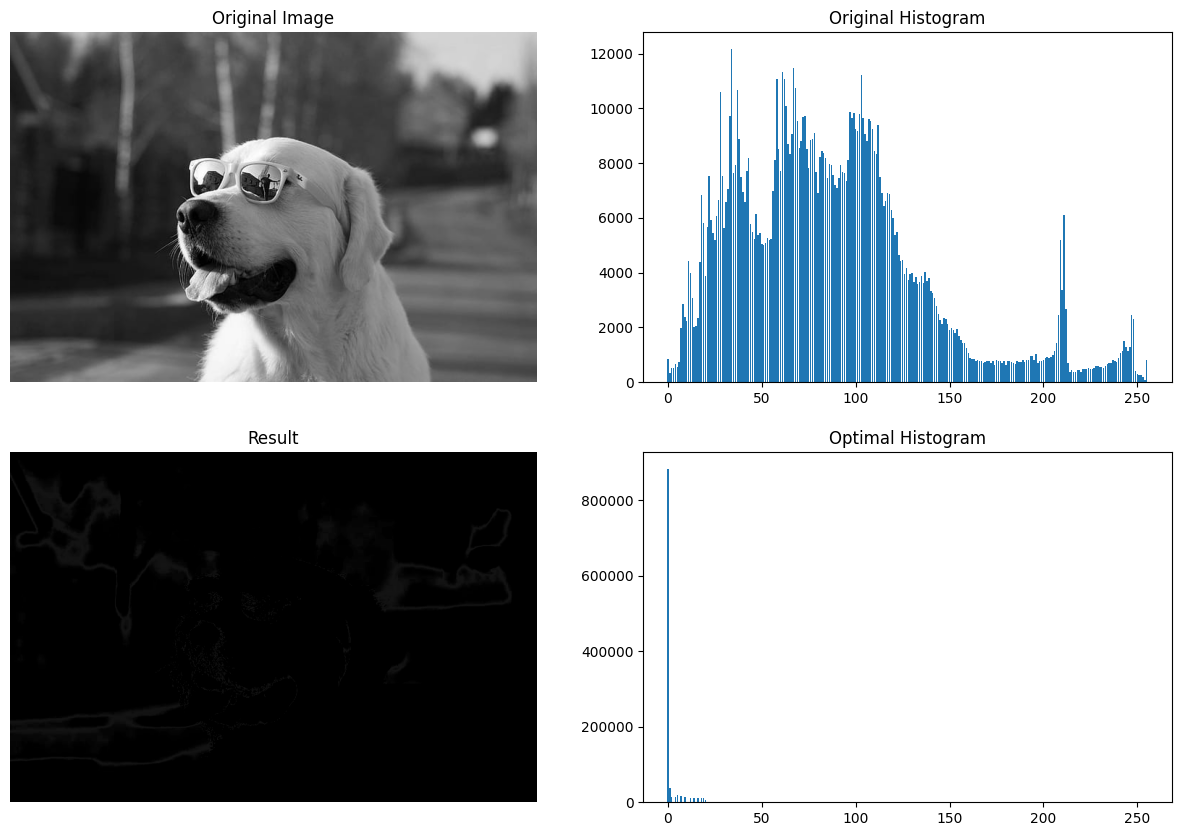

In [33]:
#sarinakasaiyan

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
i = cv2.imread('/content/Histogram_Matching.jpg')

# Extreme changes for greater impact
sigma = 5.0  # Increase sigma for a very wide distribution
center = 50  # Change the center of the distribution to 50

h1, _ = np.histogram(i.flatten(), bins=256)
x = np.arange(256)

# Define a Gaussian distribution with extreme changes
dh = 1 / np.sqrt(2 * np.pi * sigma ** 2) * np.exp(-(x - center) ** 2 / (2 * sigma ** 2))
dh /= dh.sum()  # Normalize the distribution

# Apply nonlinear changes to pixel intensities
j = np.interp(i, x, dh * 255)  # Scale to 255 for integer values

# Ensure j is in uint8 format and within valid range
j = np.clip(j, 0, 255).astype(np.uint8)

h2, _ = np.histogram(j.flatten(), bins=np.arange(257))  # Corrected

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.bar(np.arange(256), h1)
plt.title('Original Histogram')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(j, cv2.COLOR_BGR2RGB))  # Display j correctly
plt.title('Result')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.bar(np.arange(256), h2)
plt.title('Optimal Histogram')

plt.show()